In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
sec_df_P0 = pd.read_csv("eval/results/security/P0/security_results_P0.csv")
sec_df_P1 = pd.read_csv("eval/results/security/P1/security_results_P1.csv")
sec_df_P2 = pd.read_csv("eval/results/security/P2/security_results_P2.csv")
sec_df_P3 = pd.read_csv("eval/results/security/P3/security_results_P3.csv")
sec_df_req = pd.read_csv("eval/results/security/requests-functions/security_results_requests-functions.csv")

In [3]:
#Compute per strategy security 

def security_summary(df: pd.DataFrame) -> dict:
    total_tests = len(df)

    has_a1 = df["a1_findings_occurrences"] > 0
    has_a2 = df["a2_findings_occurrences"] > 0

    no_findings = (~has_a1) & (~has_a2)

    return {
        "tests_total": total_tests,

        # prevalence (%)
        "pct_tests_with_A1": 100 * has_a1.sum() / total_tests,
        "pct_tests_with_A2": 100 * has_a2.sum() / total_tests,
        "pct_tests_with_no_findings": 100 * no_findings.sum() / total_tests,

        # volume (counts)
        "A1_total_findings": df["a1_findings_occurrences"].sum(),
        "A2_total_findings": df["a2_findings_occurrences"].sum(),

        # severity (aggregate)
        "A1_total_severity": df["a1_severity_score"].sum(),
        "A2_total_severity": df["a2_severity_score"].sum(),
    }


In [4]:
#Apply to all strategies

security_results = []

for strategy, df in [
    ("requests", sec_df_req),
    ("P0", sec_df_P0),
    ("P1", sec_df_P1),
    ("P2", sec_df_P2),
    ("P3", sec_df_P3),
]:
    r = security_summary(df)
    r["strategy"] = strategy
    security_results.append(r)

security_summary_df = pd.DataFrame(security_results)

security_summary_df = security_summary_df[[
    "strategy",
    "tests_total",

    "pct_tests_with_A1",
    "pct_tests_with_A2",
    "pct_tests_with_no_findings",

    "A1_total_findings",
    "A2_total_findings",

    "A1_total_severity",
    "A2_total_severity",
]].round(2)

security_summary_df


,strategy,tests_total,pct_tests_with_A1,pct_tests_with_A2,pct_tests_with_no_findings,A1_total_findings,A2_total_findings,A1_total_severity,A2_total_severity
0,requests,72,37.50,18.06,44.44,165,17,304,51
1,P0,64,7.81,3.12,89.06,5,2,16,8
2,P1,52,3.85,0.00,96.15,2,0,8,0
3,P2,64,3.12,1.56,95.31,2,1,8,4
4,P3,55,1.82,0.00,98.18,1,0,4,0


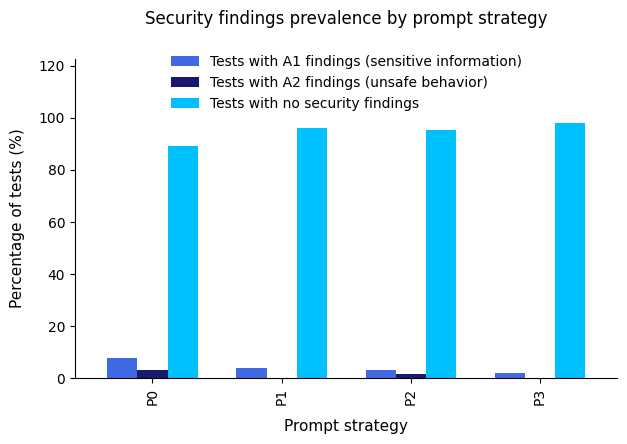

In [5]:
#Plot results in graph


# Plot data: prevalence of security findings
plot_df = security_summary_df.set_index("strategy")[
    [
        "pct_tests_with_A1",
        "pct_tests_with_A2",
        "pct_tests_with_no_findings",
    ]
]

# Color choice:
# A1 (secrets)        -> strong blue
# A2 (unsafe ops)     -> darker blue
# No findings (clean) -> light blue
colors = [
    "royalblue",      # A1 findings
    "midnightblue",   # A2 findings
    "deepskyblue",    # No findings
]

fig, ax = plt.subplots(figsize=(7, 4.5))

plot_df.plot(
    kind="bar",
    ax=ax,
    color=colors,
    width=0.7
)

ax.set_ylabel("Percentage of tests (%)", fontsize=11, labelpad=10)
ax.set_xlabel("Prompt strategy", fontsize=11, labelpad=10)

ax.set_title(
    "Security findings prevalence by prompt strategy",
    pad=25
)

# Proportional y-axis (no wasted space, but percentages)
ax.set_ylim(0, plot_df.max().max() * 1.25)

ax.legend(
    [
        "Tests with A1 findings (sensitive information)",
        "Tests with A2 findings (unsafe behavior)",
        "Tests with no security findings",
    ],
    loc="upper center",
    bbox_to_anchor=(0.5, 1.05),
    frameon=False,
    fontsize=10
)

# Clean look (consistent with other plots)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.subplots_adjust(top=0.82)

plt.show()
